In [44]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.model_selection import train_test_split,GridSearchCV,RandomizedSearchCV
from sklearn.preprocessing import LabelEncoder,StandardScaler
from sklearn.metrics import classification_report ,accuracy_score,confusion_matrix
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier


In [45]:
data=pd.read_csv('/content/mission5.csv')
data.head(10)

,GPA,Test Score,Extracurricular Activities,Volunteer Hours,Recommendation Letters,Essay Score,Accepted
0,2.75,1374,5,16,2,9,No
1,3.90,1542,7,27,3,3,Yes
2,3.46,1040,4,29,1,9,No
3,3.20,1363,3,28,2,1,No
4,2.31,895,1,5,1,1,No
5,2.31,1533,5,34,1,4,No
6,2.12,1284,5,36,2,9,Yes
7,3.73,1206,0,23,1,6,Yes
8,3.20,1030,8,28,3,3,No
9,3.42,1548,5,30,1,1,Yes


In [46]:
data.isna().sum()

,0
GPA,0
Test Score,0
Extracurricular Activities,0
Volunteer Hours,0
Recommendation Letters,0
Essay Score,0
Accepted,0


In [47]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 102 entries, 0 to 101
Data columns (total 7 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   GPA                         102 non-null    float64
 1   Test Score                  102 non-null    int64  
 2   Extracurricular Activities  102 non-null    int64  
 3   Volunteer Hours             102 non-null    int64  
 4   Recommendation Letters      102 non-null    int64  
 5   Essay Score                 102 non-null    int64  
 6   Accepted                    102 non-null    object 
dtypes: float64(1), int64(5), object(1)
memory usage: 5.7+ KB


In [48]:
data.describe()

,GPA,Test Score,Extracurricular Activities,Volunteer Hours,Recommendation Letters,Essay Score
count,102.000000,102.000000,102.000000,102.000000,102.000000,102.000000
mean,2.942647,1247.460784,3.872549,20.735294,1.843137,5.696078
std,0.589205,222.049128,2.712901,11.623573,0.805244,2.879732
min,2.010000,801.000000,0.000000,0.000000,1.000000,1.000000
25%,2.392500,1040.500000,2.000000,12.000000,1.000000,3.000000
50%,2.965000,1263.000000,3.000000,22.000000,2.000000,5.500000
75%,3.460000,1444.000000,6.000000,30.750000,2.750000,9.000000
max,3.970000,1597.000000,9.000000,39.000000,3.000000,10.000000


In [76]:

data['Accepted'] = data['Accepted'].map({"No":0, "Yes":1})


In [50]:
data.head()

,GPA,Test Score,Extracurricular Activities,Volunteer Hours,Recommendation Letters,Essay Score,Accepted
0,2.75,1374,5,16,2,9,0
1,3.90,1542,7,27,3,3,1
2,3.46,1040,4,29,1,9,0
3,3.20,1363,3,28,2,1,0
4,2.31,895,1,5,1,1,0


In [51]:
sc=StandardScaler()
scall=['GPA','Test Score'	,'Extracurricular Activities',	'Volunteer Hours',	'Recommendation Letters'	,'Essay Score']
data[scall]=sc.fit_transform(data[scall])

In [52]:
data.head()

,GPA,Test Score,Extracurricular Activities,Volunteer Hours,Recommendation Letters,Essay Score,Accepted
0,-0.328576,0.572685,0.417641,-0.409399,0.195764,1.152968,0
1,1.632846,1.333010,1.158500,0.541627,1.443756,-0.940849,1
2,0.882389,-0.938915,0.047212,0.714541,-1.052229,1.152968,0
3,0.438937,0.522901,-0.323218,0.628084,0.195764,-1.638788,0
4,-1.079033,-1.595149,-1.064077,-1.360425,-1.052229,-1.638788,0


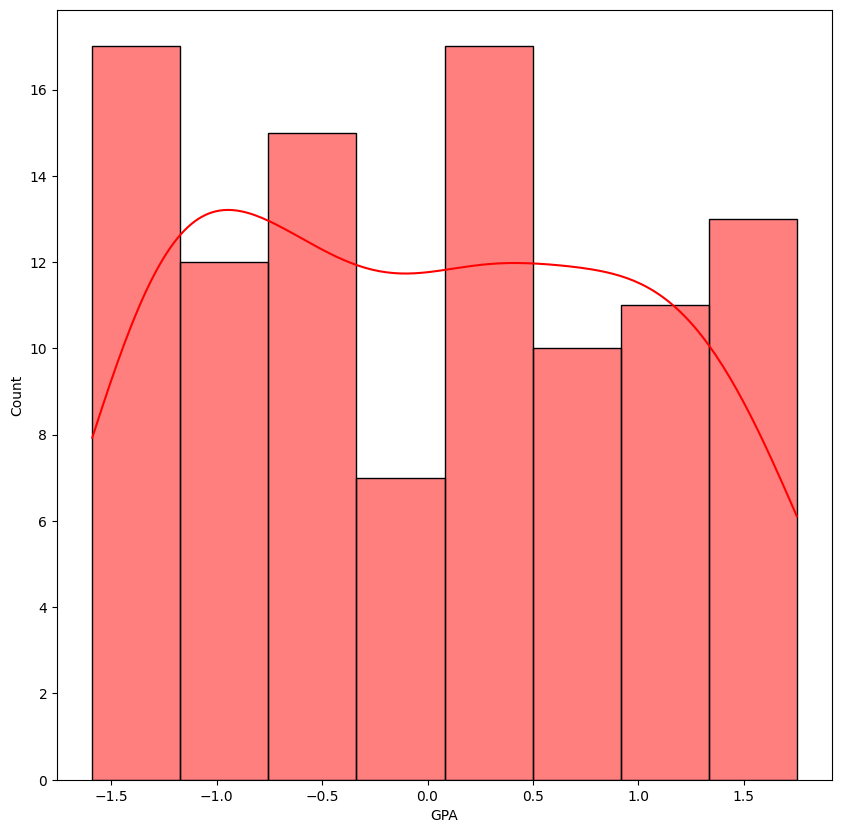

In [53]:
plt.figure(figsize=(10,10))
sns.histplot(data['GPA'],color='red',kde=True)
plt.xlabel="GBA"
plt.ylabel="Freqancy"
plt.title=("distribation")

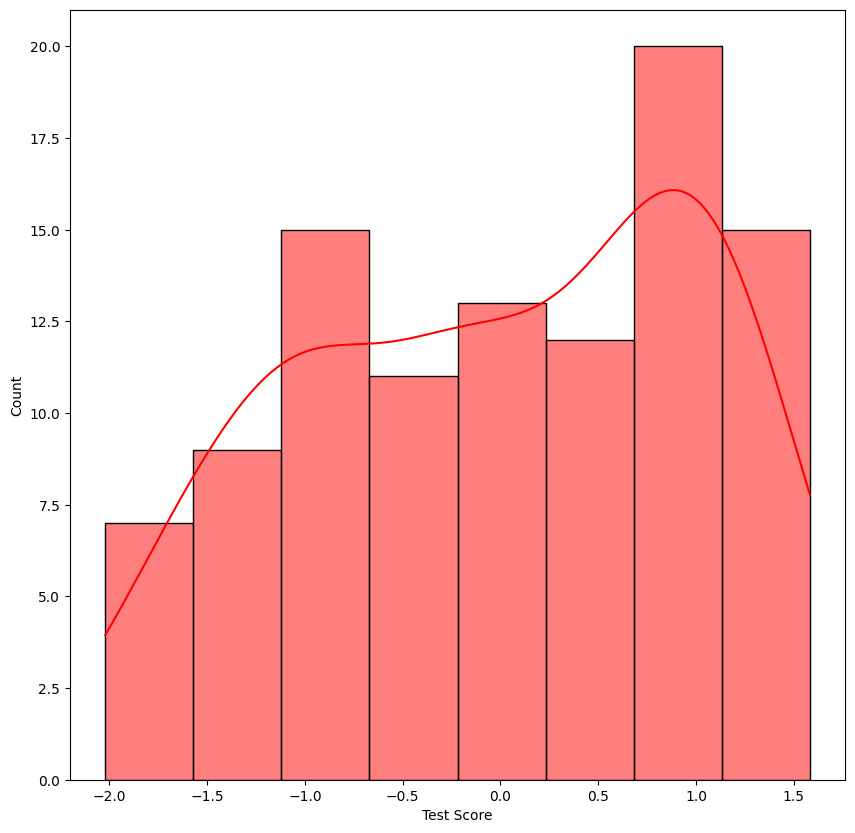

In [54]:
plt.figure(figsize=(10,10))
sns.histplot(data['Test Score'],color='red',kde=True)
plt.xlabel="Test_score"
plt.ylabel="Freqancy"
plt.title=("distribation")

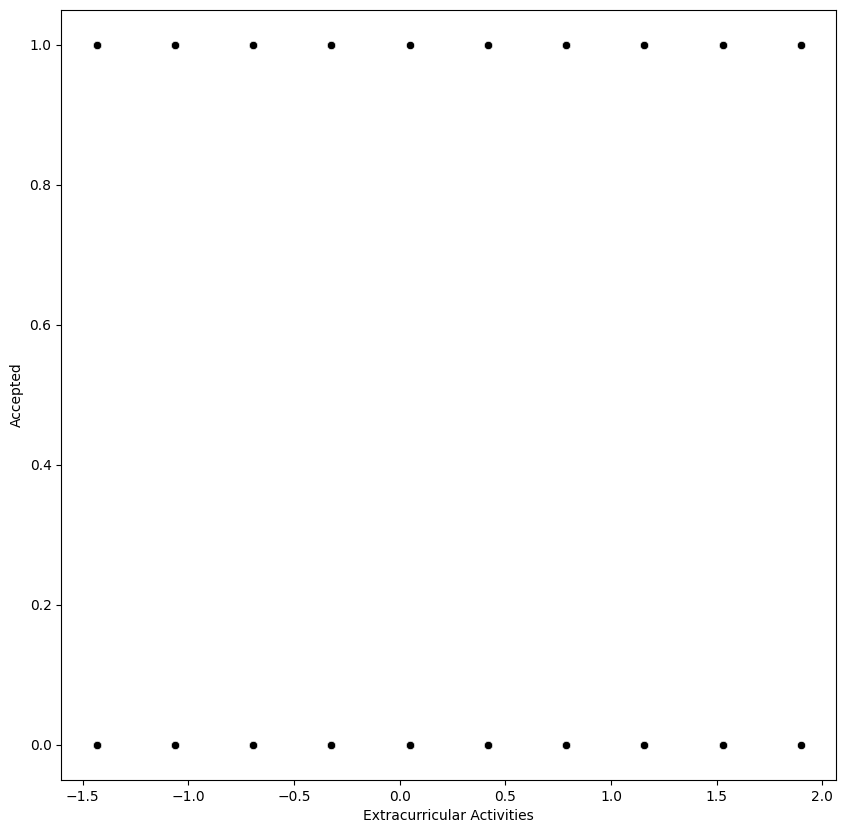

In [55]:
plt.figure(figsize=(10,10))
sns.scatterplot(x=data['Extracurricular Activities'],y=data['Accepted'],color='black')
plt.xlabel="Extracurricular Activities"
plt.ylabel="Accepted"
plt.title=("Relation between Extracurricular Activities and Accepted")

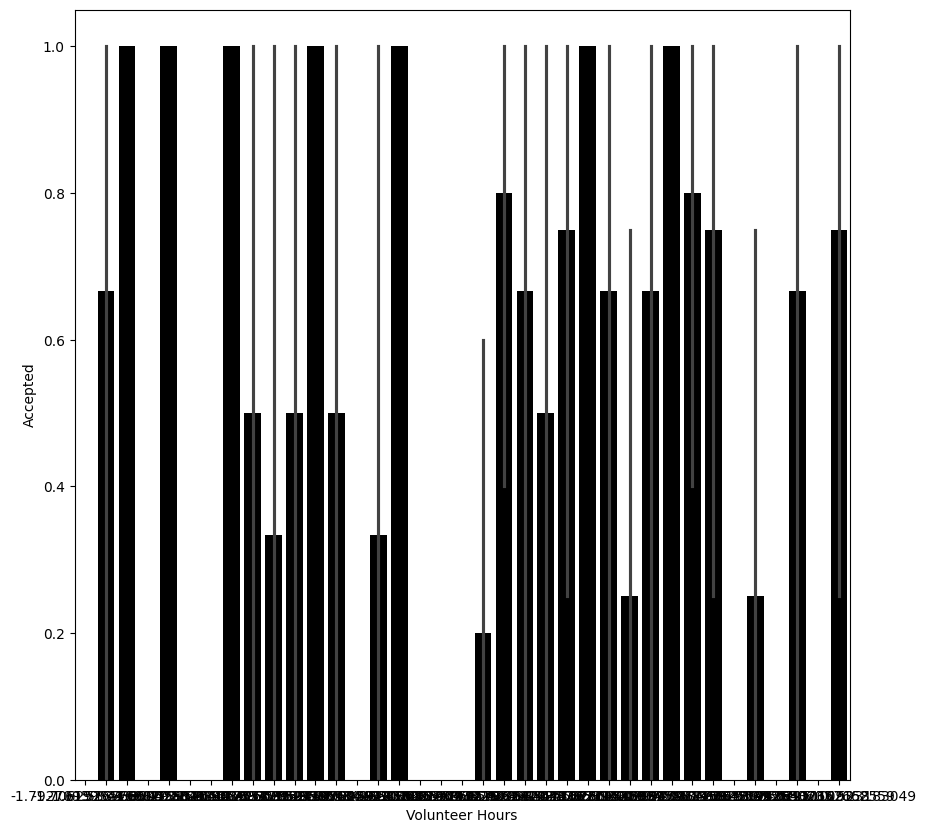

In [56]:
plt.figure(figsize=(10,10))
sns.barplot(x=data['Volunteer Hours'],y=data['Accepted'],color='black')
plt.xlabel="Volunteer Hours"
plt.ylabel='Accepted'
plt.title=("impact Volunteer Hours on Accepted")

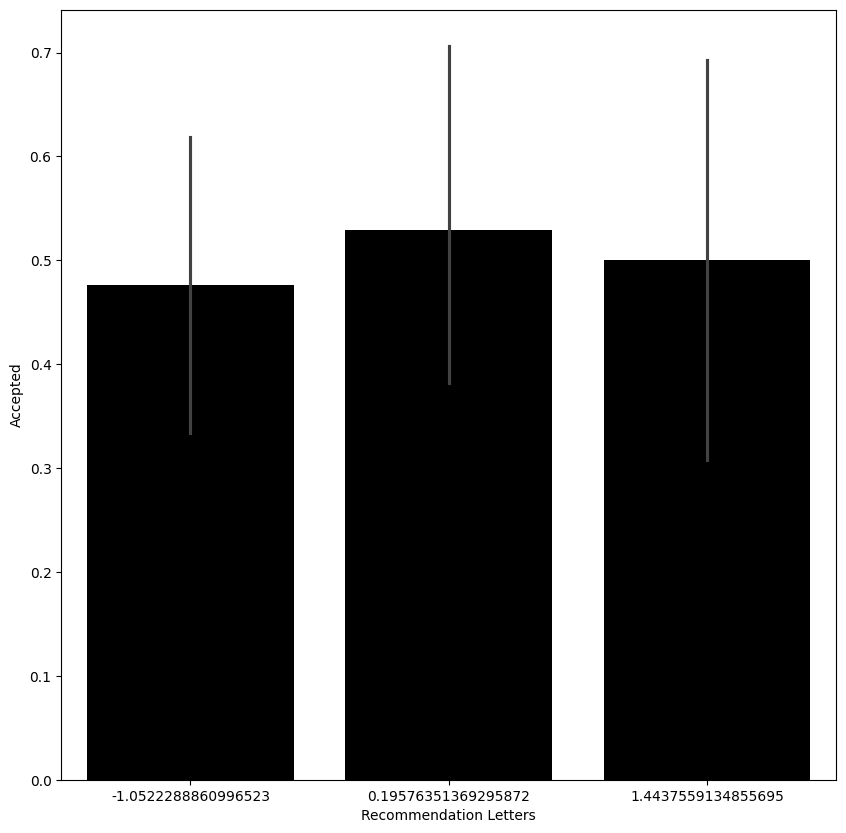

In [57]:
plt.figure(figsize=(10,10))
sns.barplot(x=data['Recommendation Letters'],y=data['Accepted'],color='black')
plt.xlabel="'Recommendation Letters'"
plt.ylabel='Accepted'
plt.title=("impact Recommendation Letters Hours on Accepted")

In [58]:
x=data.drop('Accepted',axis=1)
y=data['Accepted']
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

In [59]:
lr=LogisticRegression()
de=DecisionTreeClassifier()



In [60]:
lr.fit(x_train,y_train)

LogisticRegression()

In [61]:
de.fit(x_train,y_train)

DecisionTreeClassifier()

In [62]:
y_pred_lr=lr.predict(x_test)
y_pred_de=de.predict(x_test)


In [63]:
print("accurcy score for lr",accuracy_score(y_test,y_pred_lr))
print("clasifaction report for lr",classification_report(y_test,y_pred_lr))
print("confusion for lr",confusion_matrix(y_test,y_pred_lr))



accurcy score for lr 0.38095238095238093
clasifaction report for lr               precision    recall  f1-score   support

           0       0.40      0.36      0.38        11
           1       0.36      0.40      0.38        10

    accuracy                           0.38        21
   macro avg       0.38      0.38      0.38        21
weighted avg       0.38      0.38      0.38        21

confusion for lr [[4 7]
 [6 4]]


In [64]:
print("accurcy score for de",accuracy_score(y_test,y_pred_de))
print("clasifaction Report for de",classification_report(y_test,y_pred_de))
print("confusion matrix for de",confusion_matrix(y_test,y_pred_de))

accurcy score for de 0.6190476190476191
clasifaction Report for de               precision    recall  f1-score   support

           0       0.62      0.73      0.67        11
           1       0.62      0.50      0.56        10

    accuracy                           0.62        21
   macro avg       0.62      0.61      0.61        21
weighted avg       0.62      0.62      0.61        21

confusion matrix for de [[8 3]
 [5 5]]


<Axes: xlabel='Accepted'>

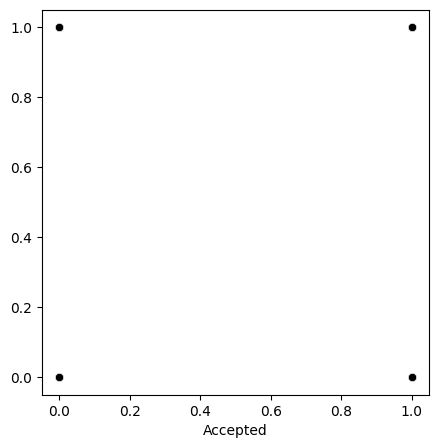

In [65]:
plt.figure(figsize=(5,5))
sns.scatterplot(x=y_test,y=y_pred_lr,color='black')



<Axes: xlabel='Accepted'>

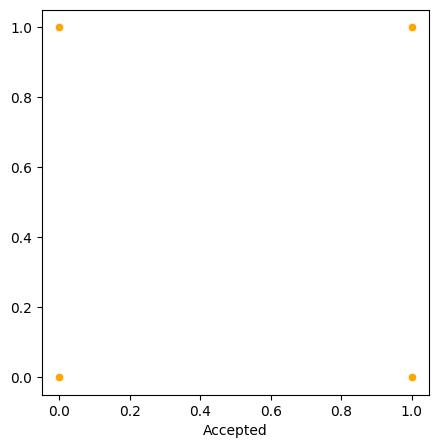

In [66]:
plt.figure(figsize=(5,5))
sns.scatterplot(x=y_test,y=y_pred_de,color='orange')


In [67]:
grid_params={
    'max_iter':[1000,2000,3000,4000,5000]

}
grid_model=GridSearchCV(lr,grid_params,cv=5)
grid_model.fit(x_train,y_train)
print("best param",grid_model.best_params_)
print("best score",grid_model.best_score_)

best param {'max_iter': 1000}
best score 0.5566176470588236


In [68]:
y_pred_grid=grid_model.best_estimator_.predict(x_test)

In [69]:
print("Acccurcy scor",accuracy_score(y_test,y_pred_grid))
print("Clasifaction Report",classification_report(y_test,y_pred_grid))
print("confusion_matrix",confusion_matrix(y_test,y_pred_grid))

Acccurcy scor 0.38095238095238093
Clasifaction Report               precision    recall  f1-score   support

           0       0.40      0.36      0.38        11
           1       0.36      0.40      0.38        10

    accuracy                           0.38        21
   macro avg       0.38      0.38      0.38        21
weighted avg       0.38      0.38      0.38        21

confusion_matrix [[4 7]
 [6 4]]


In [84]:
random_params={
    'max_depth':[10,20,30,40,50]

}
random_model=RandomizedSearchCV(de,random_params,cv=5)
random_model.fit(x_train,y_train)
print("best param",random_model.best_params_)
print("best score",random_model.best_score_)

/usr/local/lib/python3.11/dist-packages/sklearn/model_selection/_search.py:317: UserWarning: The total space of parameters 5 is smaller than n_iter=10. Running 5 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


best param {'max_depth': 10}
best score 0.6286764705882353


In [70]:
pip install gradio


In [71]:
import gradio as gr

In [72]:
data.columns

Index(['GPA', 'Test Score', 'Extracurricular Activities', 'Volunteer Hours',
       'Recommendation Letters', 'Essay Score', 'Accepted'],
      dtype='object')

In [75]:
def Accepted(GPA,Test_Score,Extracurricular_Activitie,Volunteer_Hours,Recommendation_Letters,Essay_Score):
  try:
    input_data=pd.DataFrame({
        'GPA':[GPA],
        'Test Score':[Test_Score],
        'Extracurricular Activities':[Extracurricular_Activitie],
        'Volunteer Hours':[Volunteer_Hours],
        'Recommendation Letters':[Recommendation_Letters],
        'Essay Score':[Essay_Score]
 })

    input_data[scall]=sc.transform(input_data[scall])
    predication=lr.predict(input_data)
    if predication[0] == 0:
          return "No"
    else:
          return "Yes"
    return f" predictied Accepted or not: ${predication[0]:,.2f}"
  except Exception as e:
    return str(e)
gr.Interface(
    fn=Accepted,
    inputs=[
        gr.Number(label='GPA'),
        gr.Number(label='Test Score'),
        gr.Number(label='Extracurricular Activities'),
        gr.Number(label='Volunteer Hours'),
        gr.Number(label='Recommendation Letters'),
        gr.Number(label='Essay Score')
        ],
    outputs=gr.Textbox(label='predication'),
    title="predication Accepted or not"

).launch()


It looks like you are running Gradio on a hosted a Jupyter notebook. For the Gradio app to work, sharing must be enabled. Automatically setting `share=True` (you can turn this off by setting `share=False` in `launch()` explicitly).

Colab notebook detected. To show errors in colab notebook, set debug=True in launch()
* Running on public URL: https://65369c37711f8a4696.gradio.live

This share link expires in 1 week. For free permanent hosting and GPU upgrades, run `gradio deploy` from the terminal in the working directory to deploy to Hugging Face Spaces (https://huggingface.co/spaces)
